In this notebook, we'll use a KNN classifier and the 3 second features data of the GTZAN dataset. It includes 59 different features for 3 second snippets of songs and the true genres/labels of each sample. After performing feature selection, normalization, and regularization are performed as needed, the resulting accuracy of the KNN classifier will be compared to the results of the CNN on the spectrogram data.

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [25]:
#Import data
features_df = pd.read_csv("data/features_3_sec.csv")

In [26]:
#data exploration
features_df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [27]:
features = features_df.to_numpy() #since we've been working with numpy in this class

In [28]:
features.shape

(9990, 60)

In [38]:
features_no_filenames = features[:,1:]
filenames = features[:,0]
X = features_no_filenames[:,:-1]
y = features[:,-1]

['blues.00000.0.wav' 'blues.00000.1.wav' 'blues.00000.2.wav' ...
 'rock.00099.7.wav' 'rock.00099.8.wav' 'rock.00099.9.wav']


In [45]:
#split into train 60%, valid 20%, test 20%

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [47]:
#knn without any feature selection, etc
KNNClassifier = KNeighborsClassifier(n_neighbors=5)  
KNNClassifier.fit(X_train,y_train)
y_pred_valid = KNNClassifier.predict(X_valid)
sklearn.metrics.accuracy_score(y_valid,y_pred_valid)

0.26426426426426425

best accuracy k: 39


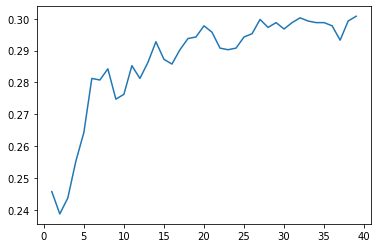

In [63]:
#find best k
#one says sqrt N = ~31
ks = [i for i in range(1,40)]
accs = []

for k in ks:
    KNNClassifier = KNeighborsClassifier(n_neighbors=k)  
    KNNClassifier.fit(X_train,y_train)
    y_pred_valid = KNNClassifier.predict(X_valid)
    accs.append(sklearn.metrics.accuracy_score(y_valid,y_pred_valid))
print("best accuracy k:",ks[np.argmax(accs)])
plt.plot(ks,accs)

Let's pick k = 30 for now, since it's close to the sqrt of the number of samples.

In [69]:
#test
KNNClassifier = KNeighborsClassifier(n_neighbors=30)  
KNNClassifier.fit(X_train,y_train)
y_pred_test = KNNClassifier.predict(X_test)
print("Test Accuracy:",sklearn.metrics.accuracy_score(y_test,y_pred_test))

Test Accuracy: 0.2877877877877878


In [ ]:
#feature selection